In [1]:
#Importing all necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score

In [2]:
#Retrieved our datsets and transformed them into DataFrames 
df_train = pd.read_csv('train_LoanPred.csv')
df_test = pd.read_csv('test_LoanPred.csv')
df_train = pd.DataFrame(df_train)
df_test= pd.DataFrame(df_test)

In [3]:
#Duplicates are dropped
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

df_train['Loan_Status']= df_train['Loan_Status'].map({'Y':1, 'N':0})
#All unnecessary columns are dropped
df_train = df_train.drop(columns=['Gender'])
df_train = df_train.drop(columns=['Dependents'])
df_train = df_train.drop(columns=['Self_Employed'])
df_train = df_train.drop(columns=['Credit_History'])
df_train = df_train.drop(columns=['Loan_ID'])
df_train = df_train.drop(columns=['Married'])
df_train = df_train.drop(columns=['Education'])
df_train = df_train.drop(columns=['Property_Area'])
df_train.head()






,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,NaN,360.0,1
1,4583,1508.0,128.0,360.0,0
2,3000,0.0,66.0,360.0,1
3,2583,2358.0,120.0,360.0,1
4,6000,0.0,141.0,360.0,1


In [4]:
# All the null valus in our dataset are filled using the mean, mode methods
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])
null_count = df_train.isnull().sum()
print(f"Numbers of null value in colomn ApplicantIncome is:  {null_count}")
df_train.head() 

Numbers of null value in colomn ApplicantIncome is:  ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,146.412162,360.0,1
1,4583,1508.0,128.000000,360.0,0
2,3000,0.0,66.000000,360.0,1
3,2583,2358.0,120.000000,360.0,1
4,6000,0.0,141.000000,360.0,1


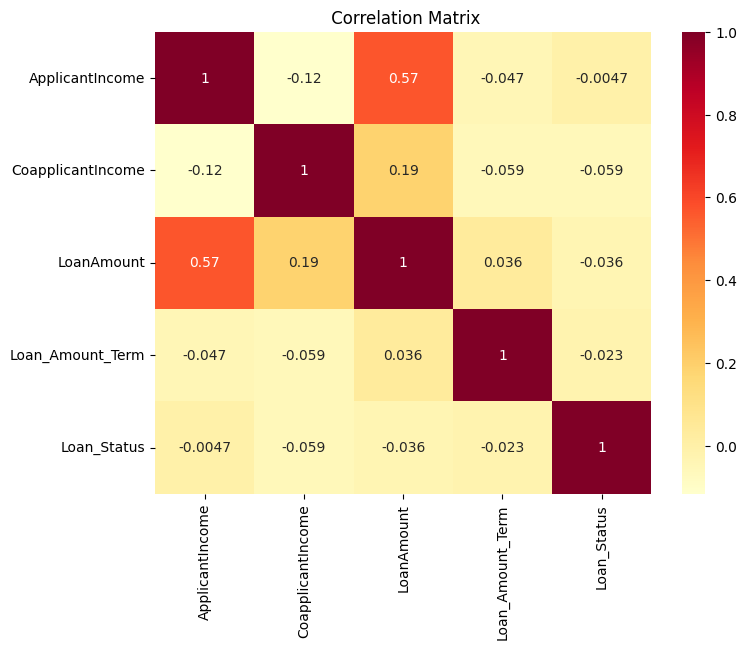

In [5]:
#colomns are tested for their correlations using correlation matrix with heatmap function
plt.figure(figsize=(8,6))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'YlOrRd')
plt.title(" Correlation Matrix")
plt.show()

In [6]:
#necessary features are selected to train our model with
x = df_train[['LoanAmount', 'ApplicantIncome']]
y = df_train[['Loan_Status']]
#slitition of our data to train and test parts using train_test_split library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42 )
scaler = StandardScaler()
#data is scalled here
x_train_scalled = scaler.fit_transform(x_train)

In [7]:
#model is selected to be trained
model_lr = LinearRegression()
model_lr.fit(x_train_scalled, y_train)

y_pred = model_lr.predict(x_test)


c:\Users\HaNif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print predictions and evaluation metrics
print("Predictions:", y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Predictions: [[ 7.98750108]
 [ 3.71658663]
 [ 2.96510579]
 [ 3.06056551]
 [ 2.84254878]
 [ 0.87192192]
 [ 3.14211692]
 [ 3.29220524]
 [ 0.67364942]
 [-0.21189785]
 [ 5.78854807]
 [ 1.55833195]
 [ 1.51213569]
 [ 2.45797248]
 [ 3.26232003]
 [ 2.72471657]
 [ 2.75149178]
 [ 3.99083086]
 [ 2.0035588 ]
 [ 5.24493805]
 [ 0.64158427]
 [ 2.48309444]
 [ 3.73851027]
 [ 5.66237626]
 [17.2454738 ]
 [ 7.83238672]
 [ 0.61851712]
 [ 2.60974801]
 [ 3.34836689]
 [ 5.26359313]
 [ 3.47331182]
 [ 1.73014145]
 [ 2.34257261]
 [ 2.7050541 ]
 [ 9.24798686]
 [ 4.28015432]
 [ 2.06211331]
 [ 5.57982842]
 [ 2.28527187]
 [-0.86607974]
 [ 4.91214425]
 [ 1.04670974]
 [10.65885121]
 [ 2.12401925]
 [ 1.84064748]
 [ 3.3232235 ]
 [ 2.09712333]
 [ 2.74354119]
 [ 2.85991112]
 [ 5.16373671]
 [ 0.49066465]
 [ 9.46969411]
 [ 1.17765026]
 [ 3.2311591 ]
 [ 1.42795   ]
 [ 1.40400057]
 [ 2.05661045]
 [ 6.04964503]
 [ 1.40104914]
 [ 5.12320683]
 [40.94758728]
 [ 2.51730556]
 [ 6.42575996]
 [ 7.26140506]
 [ 2.4757743 ]
 [ 5.4041478